In [1]:
import matplotlib
import loadnotebook
from helper import * 

importing Jupyter notebook from helper.ipynb


helper.ipynb:524: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  "\n",


RSRP not found ../data/demo-priority6/set5/Reed/139/18Aug22_091649 139.1.nmf
RSRP not found ../data/demo-priority6/set5/Peter/133/A_18Aug22_091045-133.1.nmf
total point :  195
missing point :  [8, 11, 14, 17, 20, 23, 25, 29, 32, 35, 38, 41, 45, 49, 51, 54, 56, 59, 62, 65, 68, 71, 126, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282]
[42. 37. 38. 39. 41. 40.]


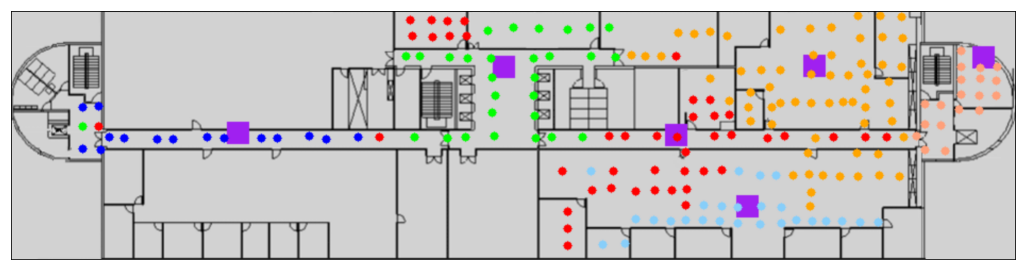

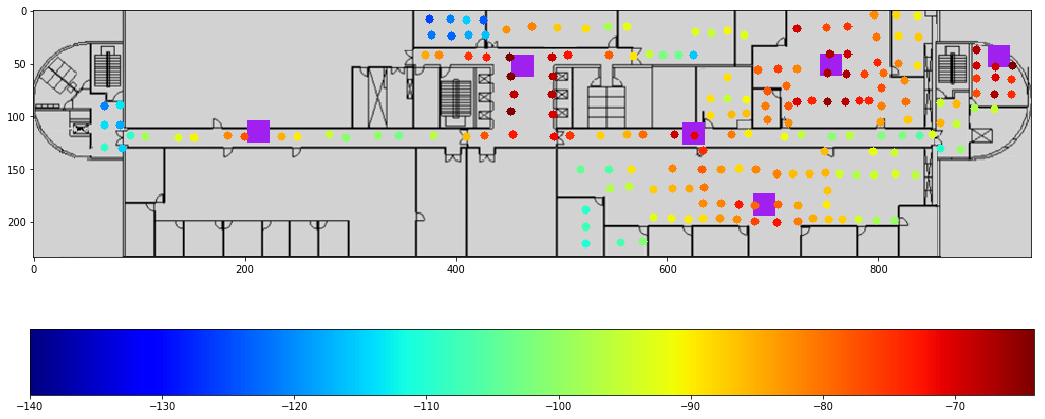

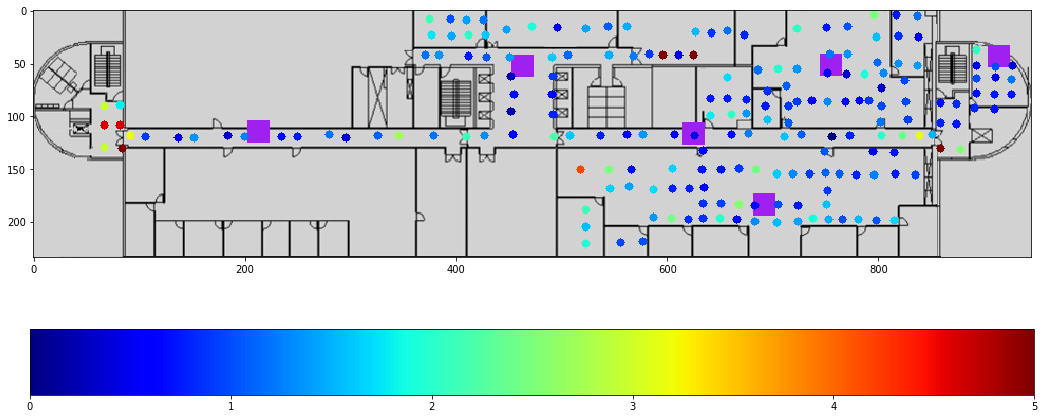

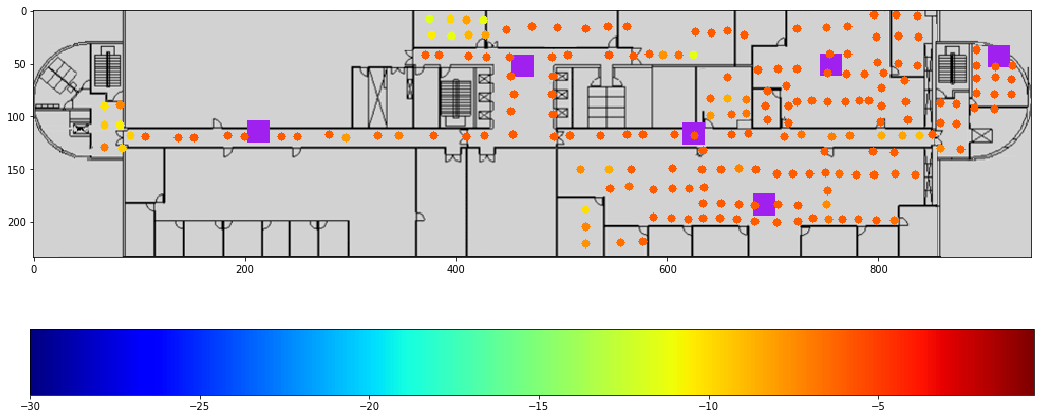

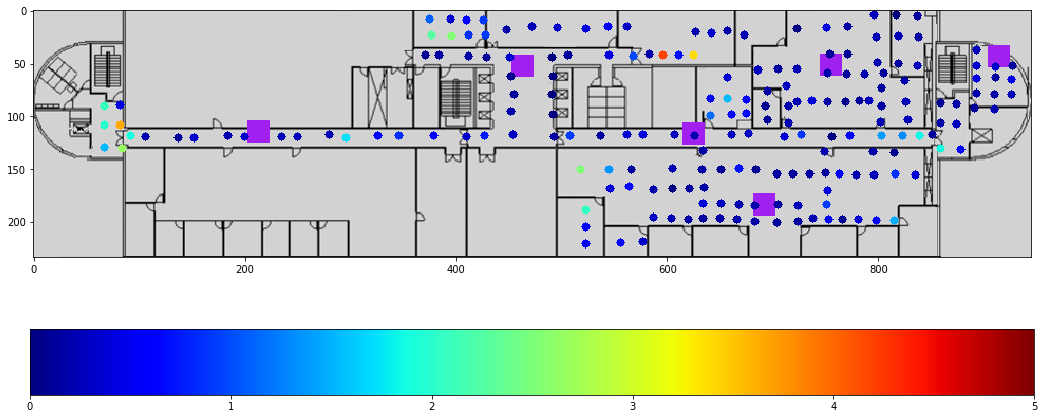

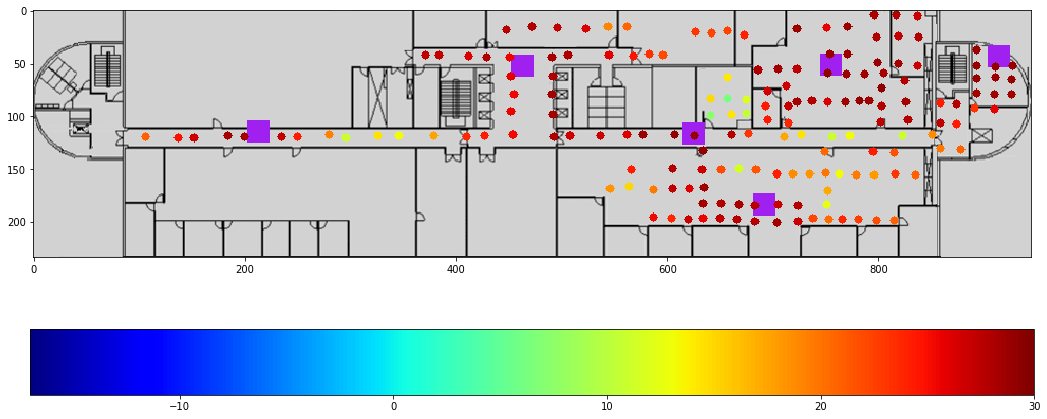

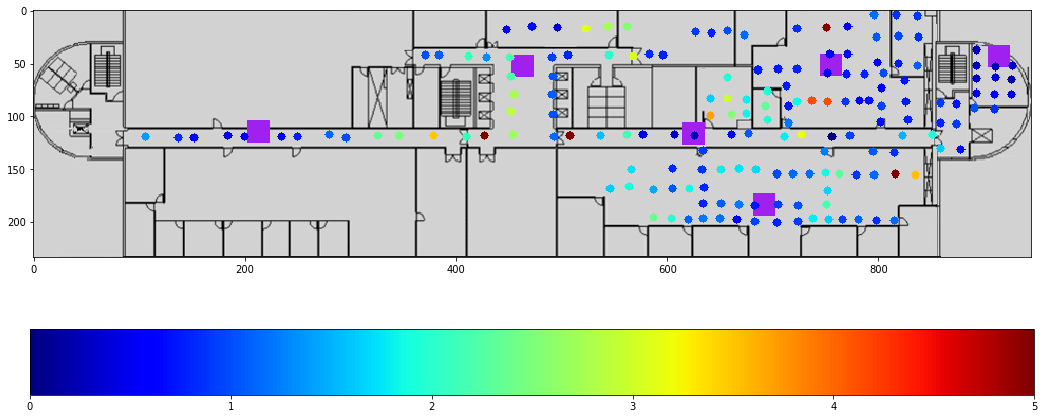

In [2]:
priority = 6
set_value = 5
expected_total_point = 291
source = get_source(priority, set_value)

output_csv = "../results/demo_priority_" + str(priority) + "/set" + str(set_value) + ".csv"

def get_output_image(prefix="") :
    return "../results/demo_priority_" + str(priority) + "/images/set" + \
            str(set_value) + "_" + prefix + ".png"

result = extract_data(config={priority : [set_value]}, feature=True)
# result = result[result["PCI"].isin(whitelist)] 

total_point = len(result.groupby(["location_x", "location_y"]).agg(['count']))
print("total point : ", total_point)

# because set 1 we have't rename the folder based on location number
# this block only work for priority 6 set > 2
if total_point < expected_total_point and  priority == 6 and set_value != 1 :
    d = {}
    source = get_source(priority, set_value)
    filenames, _ = get_filenames(source)
    for f in filenames : 
        d[int(f.split("/")[-2])]=f
        
    missing_point = []
    arr = np.arange(expected_total_point)
    for a in arr :
        if a not in d :
            missing_point.append(a)
    
    print("missing point : ", missing_point)


result.to_csv(output_csv, index=False)

df = result.dropna(subset=["PCI"])
lon_list = df["location_x"].astype('int32')
lon_list = [x for x in lon_list]
lat_list = df["location_y"].astype('int32')
lat_list = [x for x in lat_list]
pci_list = df["PCI"].astype('int32')
pci_list = [x for x in pci_list]
print(df.PCI.unique())

new_backtorgb = get_map_image()
pci_color = [pci_color_dict[x] if x in pci_color_dict else (255, 255, 255) for x in pci_list]
new_backtorgb = visualize(new_backtorgb, lon_list, lat_list, pci_color, get_output_image("pci"))

df = result.dropna(subset=["RSRQ"])
lon_list = df["location_x"].astype('int32')
lon_list = [x for x in lon_list]
lat_list = df["location_y"].astype('int32')
lat_list = [x for x in lat_list]
rsrp_list = df["RSRP"].astype('int32')
rsrp_list = [x for x in rsrp_list]

rsrp_summary = summary_based_on_location(lat_list, lon_list, rsrp_list)
rsrp_summary = summary_dict(rsrp_summary, np.array)

normalize_rsrp_mean = matplotlib.colors.Normalize(vmin=-140, vmax=-64)
rsrp_mean = summary_dict(rsrp_summary, np.mean)
x_list, y_list, rsrp_mean_list = summary_dict_to_list(rsrp_mean)
colors_rsrp_mean = [cmap(normalize_rsrp_mean(value))[:3] for value in rsrp_mean_list]
colors_rsrp_mean = [[int(x*255) for x in value] for value in colors_rsrp_mean]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrp_mean, 
                               cmap, normalize_rsrp_mean, get_output_image("rsrp_mean"))

normalize_rsrp_std = matplotlib.colors.Normalize(vmin=0, vmax=5)
rsrp_std = summary_dict(rsrp_summary, np.std)
x_list, y_list, rsrp_std_list = summary_dict_to_list(rsrp_std)
colors_rsrp_std = [cmap(normalize_rsrp_std(value))[:3] for value in rsrp_std_list]
colors_rsrp_std = [[int(x*255) for x in value] for value in colors_rsrp_std]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrp_std, 
                               cmap, normalize_rsrp_std, get_output_image("rsrp_std"))

df = result.dropna(subset=["RSRQ"])
lon_list = df["location_x"].astype('int32')
lon_list = [x for x in lon_list]
lat_list = df["location_y"].astype('int32')
lat_list = [x for x in lat_list]
rsrq_list = df["RSRQ"].astype('int32')
rsrq_list = [x for x in rsrq_list]

rsrq_summary = summary_based_on_location(lat_list, lon_list, rsrq_list)
rsrq_summary = summary_dict(rsrq_summary, np.array)

normalize_rsrq_mean = matplotlib.colors.Normalize(vmin=-30, vmax=-0.4)
rsrq_mean = summary_dict(rsrq_summary, np.mean)
x_list, y_list, rsrq_mean_list = summary_dict_to_list(rsrq_mean)
colors_rsrq_mean = [cmap(normalize_rsrq_mean(value))[:3] for value in rsrq_mean_list]
colors_rsrq_mean = [[int(x*255) for x in value] for value in colors_rsrq_mean]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrq_mean,
                               cmap, normalize_rsrq_mean, get_output_image("rsrq_mean"))

normalize_rsrq_std = matplotlib.colors.Normalize(vmin=0, vmax=5)
rsrq_std = summary_dict(rsrq_summary, np.std)
x_list, y_list, rsrq_std_list = summary_dict_to_list(rsrq_std)
colors_rsrq_std = [cmap(normalize_rsrq_std(value))[:3] for value in rsrq_std_list]
colors_rsrq_std = [[int(x*255) for x in value] for value in colors_rsrq_std]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrq_std,
                               cmap, normalize_rsrq_std, get_output_image("rsrq_std"))

df = result.dropna(subset=["SNR"])
lon_list = df["location_x"].astype('int32')
lon_list = [x for x in lon_list]
lat_list = df["location_y"].astype('int32')
lat_list = [x for x in lat_list]
snr_list = df["SNR"].astype('int32')
snr_list = [x for x in snr_list]

snr_summary = summary_based_on_location(lat_list, lon_list, snr_list)
snr_summary = summary_dict(snr_summary, np.array)

normalize_snr_mean = matplotlib.colors.Normalize(vmin=-17, vmax=30)
snr_mean = summary_dict(snr_summary, np.mean)
x_list, y_list, snr_mean_list = summary_dict_to_list(snr_mean)
colors_snr_mean = [cmap(normalize_snr_mean(value))[:3] for value in snr_mean_list]
colors_snr_mean = [[int(x*255) for x in value] for value in colors_snr_mean]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_snr_mean,
                               cmap, normalize_snr_mean, get_output_image("snr_mean"))

normalize_snr_std = matplotlib.colors.Normalize(vmin=0, vmax=5)
snr_std = summary_dict(snr_summary, np.std)
x_list, y_list, snr_std_list = summary_dict_to_list(snr_std)
colors_snr_std = [cmap(normalize_snr_std(value))[:3] for value in snr_std_list]
colors_snr_std = [[int(x*255) for x in value] for value in colors_snr_std]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_snr_std, 
                               cmap, normalize_snr_std, get_output_image("snr_std"))

In [3]:
print("done")

done
